In [1]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
breast_dataset = pd.read_csv('breast_dataset.csv')

In [3]:
breast_dataset.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,Malignant
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,Malignant
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,Malignant
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,Benign
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,Benign
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,Malignant


In [4]:
breast_dataset.shape

(569, 31)

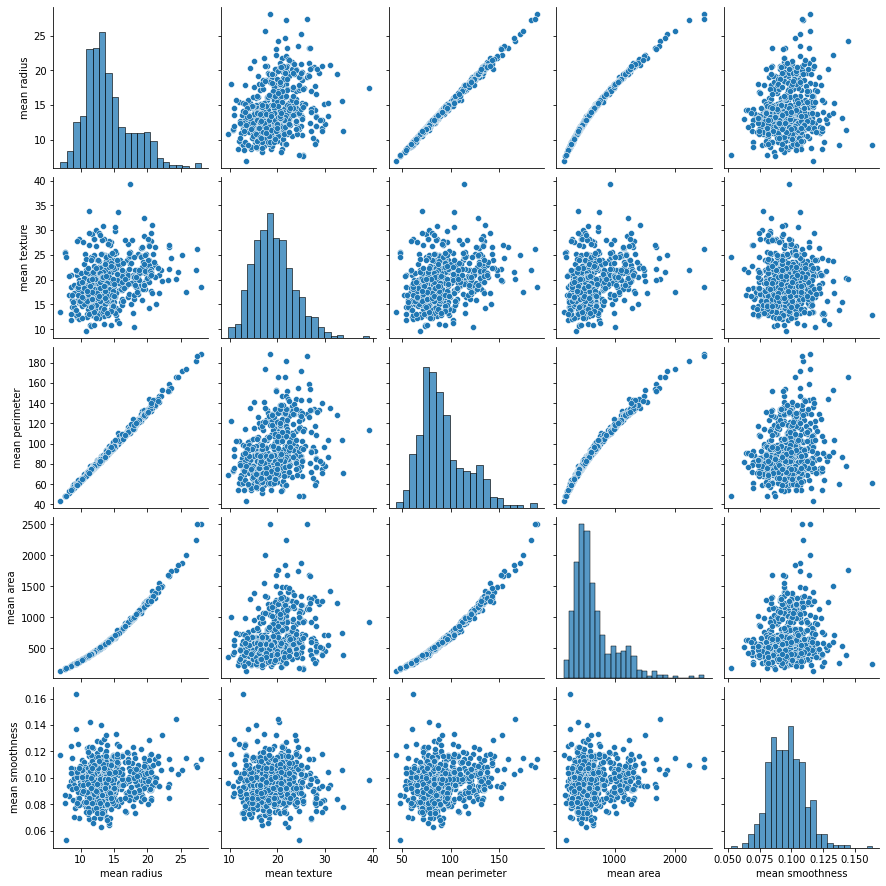

In [5]:
sns.pairplot(breast_dataset.iloc[:,range(5)])

In [6]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [7]:
# standardize the data

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness','mean compactness',
          'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']

In [10]:
# Separating out the features
x = breast_dataset.loc[:, features].values

In [11]:
# Separating out the target
y = breast_dataset.loc[:,['label']].values

In [12]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [13]:
x

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00, ...,
         2.53247522e+00,  2.21751501e+00,  2.25574689e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00, ...,
         5.48144156e-01,  1.39236330e-03, -8.68652457e-01],
       [ 1.57988811e+00,  4.56186952e-01,  1.56650313e+00, ...,
         2.03723076e+00,  9.39684817e-01, -3.98007910e-01],
       ...,
       [ 7.02284249e-01,  2.04557380e+00,  6.72675785e-01, ...,
         1.05777359e-01, -8.09117071e-01, -8.95586935e-01],
       [ 1.83834103e+00,  2.33645719e+00,  1.98252415e+00, ...,
         2.65886573e+00,  2.13719425e+00,  1.04369542e+00],
       [-1.80840125e+00,  1.22179204e+00, -1.81438851e+00, ...,
        -1.26181958e+00, -8.20069901e-01, -5.61032377e-01]])

In [14]:
#scale the data
from sklearn.decomposition import PCA

In [15]:
#PCA
pca = PCA(n_components=2)

In [16]:
principalComponents= pca.fit_transform(x)

In [17]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [18]:
principalDf.head()

,principal component 1,principal component 2
0,5.224155,3.204428
1,1.728094,-2.540839
2,3.969757,-0.550075
3,3.596713,6.905070
4,3.151092,-1.358072


In [19]:
breast_dataset[['label']].head()

,label
0,Benign
1,Benign
2,Benign
3,Benign
4,Benign


In [20]:
finalDf = pd.concat([principalDf, breast_dataset[['label']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,label
0,5.224155,3.204428,Benign
1,1.728094,-2.540839,Benign
2,3.969757,-0.550075,Benign
3,3.596713,6.905070,Benign
4,3.151092,-1.358072,Benign


### Visualize 2D Projection

In [21]:
fig = plt.figure(figsize = (8,8))

<Figure size 576x576 with 0 Axes>

In [22]:
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

Text(0.5, 1.0, '2 component PCA')

In [23]:
label = ['A', 'B', 'C','D', 'E','F','G']
color = ['r', 'g', 'b']

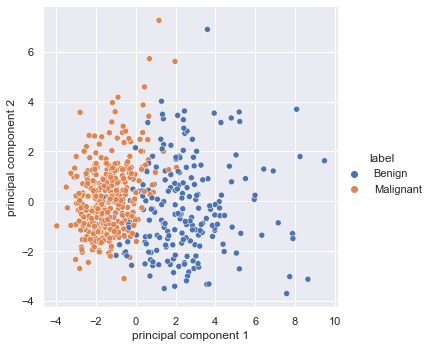

In [29]:
import seaborn as sns
sns.set(style="darkgrid")
sns.relplot(x="principal component 1", y="principal component 2", 
            hue=breast_dataset.label, data=finalDf)

In [30]:
pca.components_    # 包含PC1 和PC2

array([[ 0.36393793,  0.15445113,  0.37604434,  0.36408585,  0.23248053,
         0.36444206,  0.39574849,  0.4180384 ,  0.21523797,  0.07183744],
       [-0.31392907, -0.14718091, -0.28465789, -0.30484171,  0.40196232,
         0.26601315,  0.10428597,  0.0071836 ,  0.36830091,  0.5717677 ]])

In [31]:
pca.components_[0]   # PC1里面的元素

array([0.36393793, 0.15445113, 0.37604434, 0.36408585, 0.23248053,
       0.36444206, 0.39574849, 0.4180384 , 0.21523797, 0.07183744])